In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas_profiling
%matplotlib inline

In [75]:
df = pd.read_csv("train.csv")

In [76]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#pandas_profiling.ProfileReport(df)

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [77]:
base_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',]

In [78]:
df_base = df[base_columns]

In [79]:
df_base.head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,Gd,TA,No,GLQ,706,Unf,0,150,856
1,Gd,TA,Gd,ALQ,978,Unf,0,284,1262
2,Gd,TA,Mn,GLQ,486,Unf,0,434,920
3,TA,Gd,No,ALQ,216,Unf,0,540,756
4,Gd,TA,Av,GLQ,655,Unf,0,490,1145


In [80]:
df_base.fillna("No Basement",axis = 1 , inplace = True)

In [81]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtQual      1460 non-null   object
 1   BsmtCond      1460 non-null   object
 2   BsmtExposure  1460 non-null   object
 3   BsmtFinType1  1460 non-null   object
 4   BsmtFinSF1    1460 non-null   int64 
 5   BsmtFinType2  1460 non-null   object
 6   BsmtFinSF2    1460 non-null   int64 
 7   BsmtUnfSF     1460 non-null   int64 
 8   TotalBsmtSF   1460 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 102.8+ KB


## Garage

In [82]:
garage_col = ['GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond']

df_garage = df[garage_col]

In [83]:
df_garage.head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,TA,TA
1,Attchd,1976.0,RFn,2,460,TA,TA
2,Attchd,2001.0,RFn,2,608,TA,TA
3,Detchd,1998.0,Unf,3,642,TA,TA
4,Attchd,2000.0,RFn,3,836,TA,TA


In [84]:
df_garage['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [85]:
df_garage.fillna("No Garage",axis = 1 , inplace = True)

# Porch

In [86]:
porch_col = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
df_porch = df[porch_col]

In [87]:
df_porch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   OpenPorchSF    1460 non-null   int64
 1   EnclosedPorch  1460 non-null   int64
 2   3SsnPorch      1460 non-null   int64
 3   ScreenPorch    1460 non-null   int64
dtypes: int64(4)
memory usage: 45.8 KB


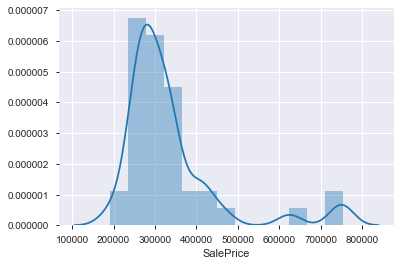

In [88]:
sns.distplot(df[df['Neighborhood'] == 'NoRidge']['SalePrice'])

In [89]:
df[(df['Neighborhood'] == 'NoRidge') & (df['SalePrice'] > 500000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [90]:
df['SalePrice'].mean()

180921.19589041095

In [91]:
df['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [92]:
pool_col = ['PoolArea' ,'PoolQC']
df[df['PoolArea'] != 0][['PoolArea' ,'PoolQC','SalePrice','YearBuilt','LotArea','MSSubClass', 'MSZoning','Neighborhood']]

,PoolArea,PoolQC,SalePrice,YearBuilt,LotArea,MSSubClass,MSZoning,Neighborhood
197,512,Ex,235000,1918,25419,75,RL,NAmes
810,648,Fa,181000,1974,10140,20,RL,NWAmes
1170,576,Gd,171000,1977,9880,80,RL,Mitchel
1182,555,Ex,745000,1996,15623,60,RL,NoRidge
1298,480,Gd,160000,2008,63887,60,RL,Edwards
1386,519,Fa,250000,1978,16692,60,RL,NWAmes
1423,738,Gd,274970,1966,19690,80,RL,Edwards


In [94]:
df.drop(['PoolArea' ,'PoolQC'], axis = 1 , inplace = True)

In [136]:
df['Alley'].fillna("No Alley", inplace = True)
df['Fence'].fillna("No Fence", inplace = True)
df['MiscFeature'].fillna("No MiscFeature", inplace = True)
df['FireplaceQu'].fillna("No FireplaceQu", inplace = True)
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace = True)
df['MasVnrType'].fillna("None", inplace = True)
df['MasVnrArea'].fillna(0.0, inplace = True)
df['MasVnrArea'].replace(1.0,0.0,inplace = True) 
df['Electrical'].fillna("SBrkr", inplace = True)

In [100]:
df.drop(garage_col,axis = 1 , inplace = True)
df.drop(base_columns , axis = 1 , inplace  = True)

In [101]:
df = pd.concat([df,df_garage,df_base], axis = 1)

In [123]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [131]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [146]:
cat_col = df.select_dtypes(exclude=['int64','float64']).columns

In [147]:
cat_col

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'PavedDrive', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'],
      dtype='object')

In [161]:
df_cat_col = pd.DataFrame()
for col in cat_col:
    cat = pd.get_dummies(df[col],prefix = col,prefix_sep='_' , drop_first = True)
    df_cat_col = pd.concat([df_cat_col,cat] , axis = 1)

In [163]:
df.drop(cat_col,axis = 1 , inplace = True)

In [164]:
df = pd.concat([df,df_cat_col],axis = 1)

In [171]:
df.select_dtypes(exclude=['int64','float64','uint8']).columns

Index([], dtype='object')

In [173]:
df.drop('Id', axis = 1 , inplace = True)

In [175]:
x = df.drop('SalePrice',axis = 1)
y = df['SalePrice']

x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.30)

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()

lr.fit(x_train, y_train)
pred = lr.predict(x_test)

print(r2_score(y_test , pred))

0.25260861108102506


In [179]:
from sklearn.tree import DecisionTreeRegressor
dtree= DecisionTreeRegressor()
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)

print(r2_score(y_test , pred))

0.7354259042088831


In [180]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(x_train, y_train)
pred = rfr.predict(x_test)

print(r2_score(y_test , pred))

0.8352262063613356


In [181]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)

print(r2_score(y_test , pred))

[19:25:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8644075984339791
